In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
df=pd.read_csv('D:/dataset1/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Univariate Analysis

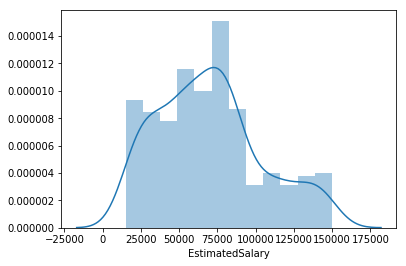

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(df['EstimatedSalary'])
plt.show()

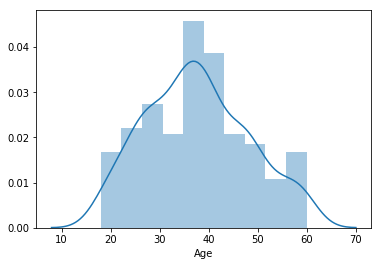

In [9]:
sns.distplot(df['Age'])
plt.show()

# Bivariate Analysis

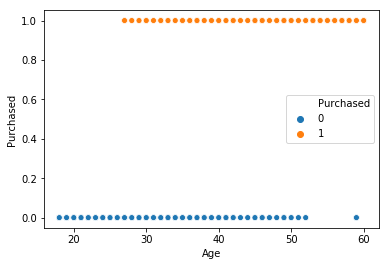

In [10]:
sns.scatterplot(x='Age', y='Purchased', hue='Purchased', data=df)

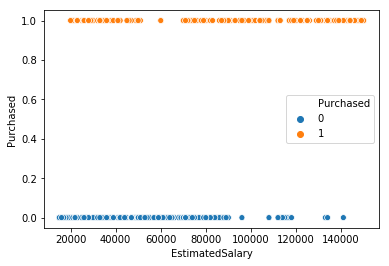

In [11]:
sns.scatterplot(x='EstimatedSalary', y='Purchased', hue='Purchased', data=df)

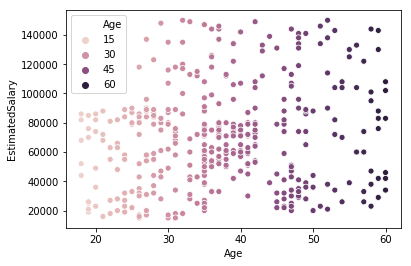

In [12]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Age', data=df)

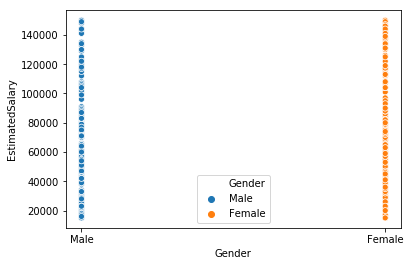

In [13]:
sns.scatterplot(x='Gender', y='EstimatedSalary', hue='Gender', data=df)

# Heatmap

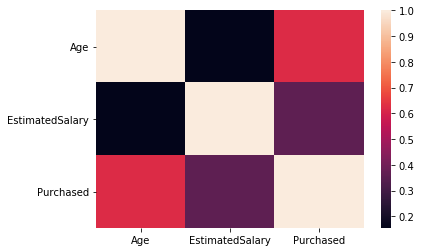

In [14]:
df=df.drop(['User ID'], axis=1)
heat_map = sns.heatmap(df.corr())

# Removing outliers

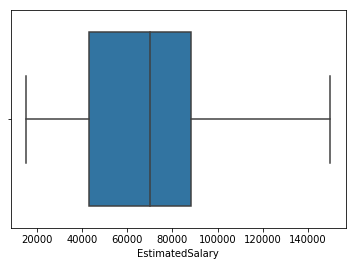

In [15]:
sns.boxplot(df['EstimatedSalary'])

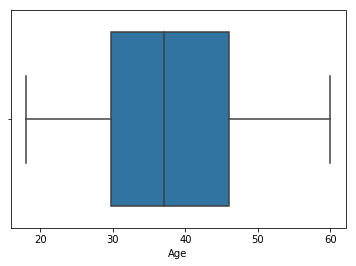

In [16]:
sns.boxplot(df['Age'])

There are no outliers.

# Modeling

In [17]:
#One hot encoding
Feature = df[['Gender','Age','EstimatedSalary']]
Feature = pd.concat([Feature,pd.get_dummies(df['Gender'])], axis=1)
Feature.drop(['Gender'], axis=1, inplace=True)
Feature.head()

,Age,EstimatedSalary,Female,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [18]:
#define model with 3 hidden layers of 10 nodes and relu as activation function
# and use MSE as loss metrics and adam as optimizer
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
#split dataset in target values and features
X=Feature.iloc[:,:]
y=df['Purchased'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
# fit scaler with train data
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train model
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
280/280 [==============================] - 0s 678us/step - loss: 0.2179
Epoch 2/100
280/280 [==============================] - 0s 96us/step - loss: 0.1972
Epoch 3/100
280/280 [==============================] - 0s 86us/step - loss: 0.1813
Epoch 4/100
280/280 [==============================] - 0s 107us/step - loss: 0.1679
Epoch 5/100
280/280 [==============================] - 0s 86us/step - loss: 0.1558
Epoch 6/100
280/280 [==============================] - 0s 86us/step - loss: 0.1438
Epoch 7/100
280/280 [==============================] - 0s 129us/step - loss: 0.1324
Epoch 8/100
280/280 [==============================] - 0s 121us/step - loss: 0.1228
Epoch 9/100
280/280 [==============================] - 0s 89us/step - loss: 0.1124
Epoch 10/100
280/280 [==============================] - 0s 100us/step - loss: 0.1040
Epoch 11/100
280/280 [==============================] - 0s 111us/step - loss: 0.0964
Epoch 12/100
280/280 [==============================] - 0s 96us/step - loss: 0.

In [22]:
#perform evaluation on train and test set
y_train_predicted = model.predict(X_train_scaled)
y_test_predicted = model.predict(X_test_scaled)

MSE_train = mean_squared_error(y_train, y_train_predicted)
MSE_test = mean_squared_error(y_test, y_test_predicted)

print('MSE on train set = {}'.format(MSE_train))
print('MSE on test set = {}'. format(MSE_test))

MSE on train set = 0.0539587382406286
MSE on test set = 0.12174713889055995


In [23]:
model.save("Social Network")